In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import scipy

In [3]:
figsize = (5,5)
fontsize=figsize[0]*3
font_conf = {'family' : 'Arial', 'weight' : 'normal','size':fontsize}
plt.rc('font', **font_conf)
colors=['steelblue',(0.9019607843137255, 0.0, 0.0, 1.0)]

# draw subgraph(a)

## loaddata

In [4]:
aps_data = pd.read_csv('../data/fig2/aps_overall.csv')  

In [5]:
label='EP'
print( f"Correlaiton between {label} and logc5 in aps is {round( float( aps_data.corr()[label] ['logCit'] )  ,5)}" )

Correlaiton between EP and logc5 in aps is -0.10722


## draw 

In [6]:
aps_data['cut'] = (pd.cut(aps_data[label],bins=10,right=True))

data1 = (aps_data.groupby(['cut']).agg({'aid':'count','logCit':'std'}).reset_index())
data1_95 = list(1.96* data1['logCit'] / (data1['aid'].apply(np.sqrt)))
data1 = (aps_data.groupby(['cut']).agg({'logCit':'mean'}).reset_index())
data1_performance = list(data1['logCit'])

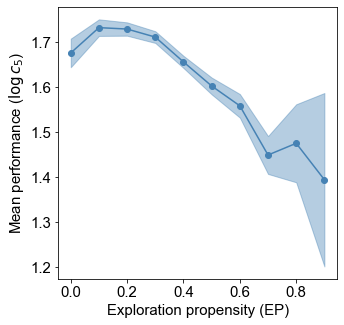

In [7]:
x_labels = np.arange(0,1,.1)
n_step=.1

fig, ax1 = plt.subplots(figsize = figsize)
ax1.plot(x_labels ,data1_performance, '-o',color=colors[0])
ax1.fill_between(  x_labels, data1_performance - np.array(data1_95)     , data1_performance+ np.array(data1_95) ,alpha=0.4,color= colors[0])
# fontsize=14
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}
ax1.set_ylabel('Mean performance ($\log c_5$)',fontdict=font_conf) # 
ax1.set_xlabel('Exploration propensity (EP)',fontdict=font_conf)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize =fontsize)
plt.yticks(fontsize =fontsize)
ax1.grid(False)
plt.savefig('./draw/figure_2a.png', format="png", bbox_inches="tight")
plt.show()

# draw subgraph(b)

In [8]:
aps_data = pd.read_csv('../data/fig2/aps_attempts.csv')  

In [9]:
left=aps_data['pastmeanlogcitation'].quantile(0)
right=aps_data['pastmeanlogcitation'].quantile(0.995) #0.995
step=(right-left)/(20-1)
x_labels = np.arange(left,right,step)
aps_data['cut'] = (pd.cut(aps_data['pastmeanlogcitation'],bins=list(np.arange(left,right,step)),right=False))

data1 = (aps_data.groupby(['cut']).agg({'aid':'count','EP':'std'}).reset_index())
data1_95 = list(1.96* data1['EP'] / (data1['aid'].apply(np.sqrt)))
data1_count = list(data1['aid'])
data1 = (aps_data.groupby(['cut']).agg({'EP':'mean'}).reset_index())
data1_performance = list(data1['EP'])

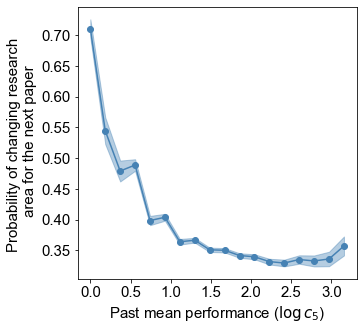

In [10]:
fig, ax1 = plt.subplots(figsize = (5, 5))
ax1.plot(x_labels[:-1] ,data1_performance, '-o',color=colors[0])
ax1.fill_between(  x_labels[:-1], data1_performance - np.array(data1_95)     , data1_performance+ np.array(data1_95) ,alpha=0.4,color= colors[0])
# fontsize=14
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}
ax1.set_ylabel('Probability of changing research \n area for the next paper',fontdict=font_conf)
ax1.set_xlabel('Past mean performance ($\log c_5$)',fontdict=font_conf)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize =fontsize)
ax1.grid(False)
plt.savefig('./draw/figure_2b.png', format="png", bbox_inches="tight")
plt.show()

# draw subgraph(c)

In [11]:
def draw_c(label, person_data):
    person_data['cut'] = (pd.cut(person_data[label],bins=10,right=False))

    data1 = (person_data.groupby(['cut']).agg({'aid':'count','post_logCit':'std'}).reset_index())
    data1_95 = list(1.96* data1['post_logCit'] / (data1['aid'].apply(np.sqrt)))
    data1 = (person_data.groupby(['cut']).agg({'post_logCit':'mean'}).reset_index())
    data1_performance = list(data1['post_logCit'])
    x_labels = np.arange(0,1,.1)
    n_step=.1

    fig, ax1 = plt.subplots(figsize = figsize)
    ax1.plot(x_labels ,data1_performance, '-o',color=colors[0])
    ax1.fill_between(  x_labels, data1_performance - np.array(data1_95)     , data1_performance+ np.array(data1_95) ,alpha=0.4,color= colors[0])

    ax1.set_ylabel('Mean future performance ($\log c_5$)',fontdict=font_conf) # 
    ax1.set_xlabel('Past exploration propensity (EP)',fontdict=font_conf)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize =fontsize)
    plt.yticks(fontsize =fontsize)
    plt.ylim(min(data1_performance - np.array(data1_95))-.25, max(data1_performance+ np.array(data1_95))+.25)
    ax1.grid(False)
    plt.savefig('./draw/figure_2c.png', format="png", bbox_inches="tight")
    plt.show()

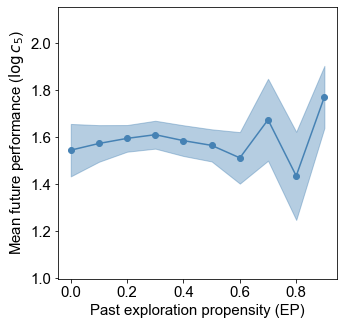

In [12]:
draw_c('past_es', pd.read_csv('../data/fig2/pastes_futurecit.csv'))

# draw subgraph(d-f)

In [13]:
def draw_margins(result,label,text,save_path):
    if(label=='EP'):
        color = colors[0]
    if(label=='ED'):
        color= colors[0]
    
    x_label=list(np.arange(0,1.05,.05))
    fig,ax1 = plt.subplots(figsize = figsize)
    ax1.plot(x_label , result['estimate'] ,label =text ,  marker ='o',color=color )
    ax1.fill_between(  x_label, list(result['min95'])    , list(result['max95']),alpha=0.4,color= color)

    # fontsize=14
    # font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}
    ax1.set_ylabel('Predictive margins',fontdict=font_conf)
    
    if(label=='EP'):
        ax1.set_xlabel('Past exploration propensity (EP)',fontdict=font_conf)
        plt.text(0.1,0.8,text,fontsize=fontsize, transform = ax1.transAxes)
    if(label=='ED'):
        ax1.set_xlabel('Past exploration distance (ED)',fontdict=font_conf)
        plt.text(0.3,0.8,text,fontsize=fontsize, transform = ax1.transAxes)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize =fontsize)
    ax1.grid(False)
    
    plt.savefig(save_path, format="png", bbox_inches="tight")
    plt.show()

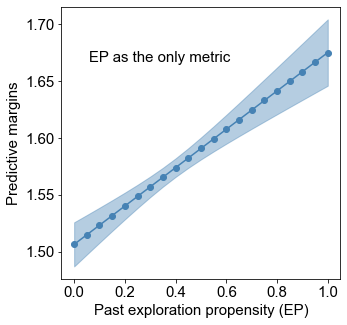

In [14]:
result = pd.read_stata('../data/fig2/10yearonlyep.dta')
draw_margins(result,'EP','EP as the only metric','./draw/figure_2d.png')

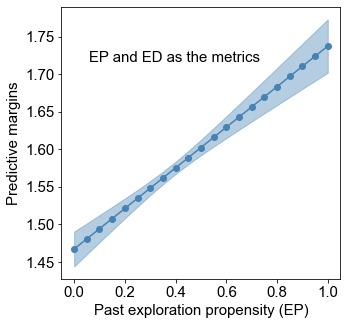

In [15]:
result = pd.read_stata('../data/fig2/10yearep.dta')
draw_margins(result,'EP','EP and ED as the metrics','./draw/figure_2e.png')

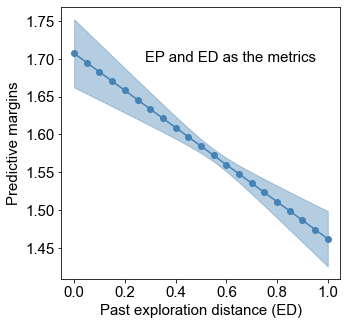

In [16]:
result = pd.read_stata('../data/fig2/10yeared.dta')
draw_margins(result,'ED','EP and ED as the metrics','./draw/figure_2f.png')